In [1]:
import os
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, ResNet50, ResNet50V2, VGG16, InceptionV3, DenseNet169, EfficientNetB4
from tensorflow.keras.utils import plot_model
import pandas as pd

from IPython.display import Image

In [2]:
tf.__version__

'2.5.0'

# Settings

In [3]:
DIR_OUT = "output"

if not os.path.exists(DIR_OUT):
    os.makedirs(DIR_OUT)

# Model

In [4]:
# model_name = "MobileNetV2"
# model = MobileNetV2(
#     input_shape=(224, 224, 3),
#     include_top=False,
#     weights=None
# )


# model_name = "ResNet50"
# model = ResNet50(
#     input_shape=(224, 224, 3),
# #     input_shape=(128, 128, 3),   # Final Output: 4x4x2048
# #     input_shape=(96, 96, 3),   # Final Output: 3x3x2048
#     include_top=False,
#     weights="imagenet"
# )

# model_name = "ResNet50V2"
# model = ResNet50V2(
#     input_shape=(224, 224, 3),
#     include_top=False,
#     weights="imagenet"
# )

model_name = "VGG16"
model = VGG16(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

# model_name = "VGG16_800x800"
# model = VGG16(
#     input_shape=(800, 800, 3),
#     include_top=False,
#     weights="imagenet"
# )

# model_name = "InceptionV3"
# model = InceptionV3(
#     input_shape=(224, 224, 3),
#     include_top=False,
#     weights=None
# )

# model_name = "DenseNet169"
# model = DenseNet169(
#     input_shape=(224, 224, 3),
#     include_top=False,
#     weights=None
# )

# model_name = "EfficientNetB4"
# model = EfficientNetB4(
#     input_shape=(224, 224, 3),
#     include_top=False,
#     weights=None
# )

## Summary

In [5]:
print(model.summary())

with open(os.path.join(DIR_OUT, f"{model_name}_model_summary.txt"), "w") as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))
        

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
_data = []

# Show Filters
for layer in model.layers:

    kernel_shape = layer.kernel.shape if hasattr(layer, "kernel") else None
    n_filters = layer.filters if hasattr(layer, "filters") else None
    padding = layer.padding if hasattr(layer, "padding") else None
    strides = layer.strides if hasattr(layer, "strides") else None
    
    def _tostring_input():
        if isinstance(layer.input, list):
            return [i.type_spec.shape.as_list() for i in layer.input]
        else:
            return layer.input.type_spec.shape
            
    
    _data.append({
        "Layer Name": layer.name,
        "Type": layer.__class__.__name__,
        "DType": layer.dtype,
        "Input Shapes": _tostring_input(),
        "Kernel": f"{kernel_shape[0]}x{kernel_shape[1]}" if kernel_shape else "-",
        "# Filters": n_filters if n_filters else "-",
        "Padding": padding if padding else "-",
        "Strides": strides,
        "Output Shape": layer.output.shape
    })
    

df_summary = pd.DataFrame(data=_data)

df_summary.to_excel(os.path.join(DIR_OUT, f"{model_name}_model_summary.xlsx"))

# print(df_summary.to_markdown())
df_summary.head(30)

,Layer Name,Type,DType,Input Shapes,Kernel,# Filters,Padding,Strides,Output Shape
0,input_1,InputLayer,float32,"(None, 224, 224, 3)",-,-,-,None,"(None, 224, 224, 3)"
1,block1_conv1,Conv2D,float32,"(None, 224, 224, 3)",3x3,64,same,"(1, 1)","(None, 224, 224, 64)"
2,block1_conv2,Conv2D,float32,"(None, 224, 224, 64)",3x3,64,same,"(1, 1)","(None, 224, 224, 64)"
3,block1_pool,MaxPooling2D,float32,"(None, 224, 224, 64)",-,-,valid,"(2, 2)","(None, 112, 112, 64)"
4,block2_conv1,Conv2D,float32,"(None, 112, 112, 64)",3x3,128,same,"(1, 1)","(None, 112, 112, 128)"
5,block2_conv2,Conv2D,float32,"(None, 112, 112, 128)",3x3,128,same,"(1, 1)","(None, 112, 112, 128)"
6,block2_pool,MaxPooling2D,float32,"(None, 112, 112, 128)",-,-,valid,"(2, 2)","(None, 56, 56, 128)"
7,block3_conv1,Conv2D,float32,"(None, 56, 56, 128)",3x3,256,same,"(1, 1)","(None, 56, 56, 256)"
8,block3_conv2,Conv2D,float32,"(None, 56, 56, 256)",3x3,256,same,"(1, 1)","(None, 56, 56, 256)"
9,block3_conv3,Conv2D,float32,"(None, 56, 56, 256)",3x3,256,same,"(1, 1)","(None, 56, 56, 256)"


## Plot

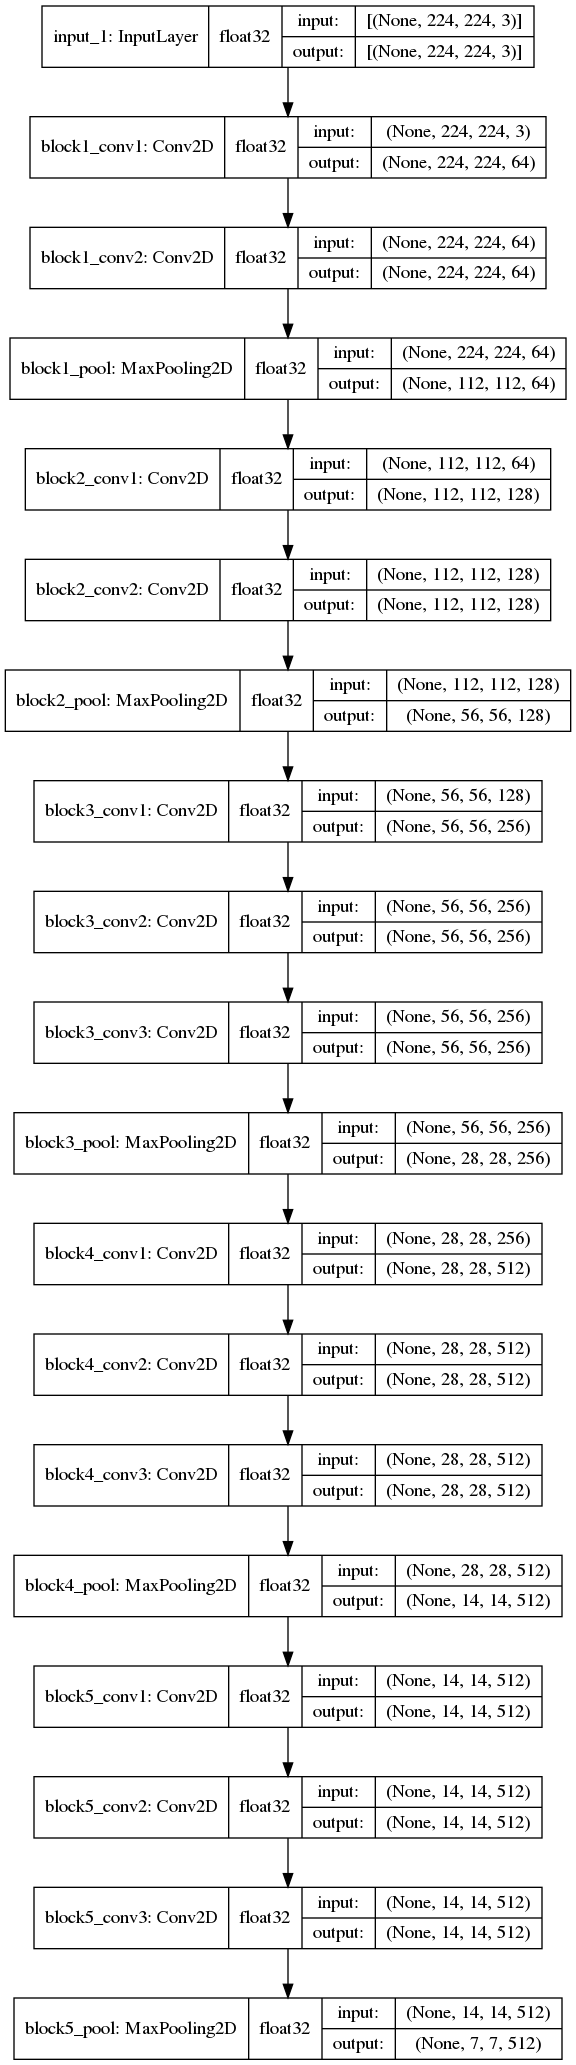

In [7]:
# Plot Graph
path_plot_save = os.path.join(DIR_OUT, f"{model_name}_model.png")
plot_model(
    model, 
    show_shapes=True, 
    show_layer_names=True, 
    show_dtype=True, 
    expand_nested=False, 
    to_file=path_plot_save
)
Image(path_plot_save, retina=True)